In [1]:
# This is a sample Python script.
from datetime import datetime
import time

from src.pairs.pairs_strategy import TradingPair
import yfinance as yf

from src.pairs.coint_functions import *

from src.pairs.portfolio import Portfolio


from src.util.DataFetcher import *

import pandas as pd
import statsmodels.api as sm

/Users/georgelyons/PycharmProjects/CQF/PairsTrading/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [10]:
# tickers = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT", "GS", "XOM", "META", "BRK-B", "MSFT", "QQQ"]
# tickers = ["BTC-USD", "ETH-USD"]
tickers = ["MSFT", "QQQ"]

start_date = datetime(2018, 1, 1)
end_date = datetime(2024, 1, 27)
tickData = get_all_adjusted_close_data(start_date, end_date, tickers)
# tickData = tickData.dropna()

print(tickData.shape)
# Most Recent Data
tickData.head(50)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

(1516, 2)


,MSFT,QQQ
Date,,
2018-01-02,80.229004,152.072769
2018-01-03,80.602371,153.550430
2018-01-04,81.311783,153.819092
2018-01-05,82.319916,155.363907
2018-01-08,82.403923,155.968369
2018-01-09,82.347916,155.978027
2018-01-10,81.974541,155.613312
2018-01-11,82.217232,156.678406
2018-01-12,83.636063,157.829865


Pair Created (MSFT, QQQ)
Start train 2019-02-11 00:00:00) End train 2020-07-22 00:00:00)
Start test 2020-07-23 00:00:00) End test 2021-06-15 00:00:00)
linear regression OLS lookback window
Beta 2.051033984226191 Constant -0.8491615118937033
Ad Fuller P  0.2867228970518407 statistic -1.9996584043245784 critical vals {'1%': -3.448493650810824, '5%': -2.8695352280356556, '10%': -2.5710293341377715}
TODO TRADE STRAT


/Users/georgelyons/PycharmProjects/CQF/PairsTrading/src/cointegration/linear_regression.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.c = self.model.params[0]
/Users/georgelyons/PycharmProjects/CQF/PairsTrading/src/cointegration/linear_regression.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.beta = self.model.params[1]
/Users/georgelyons/PycharmProjects/CQF/PairsTrading/src/pairs/coint_functions.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the 

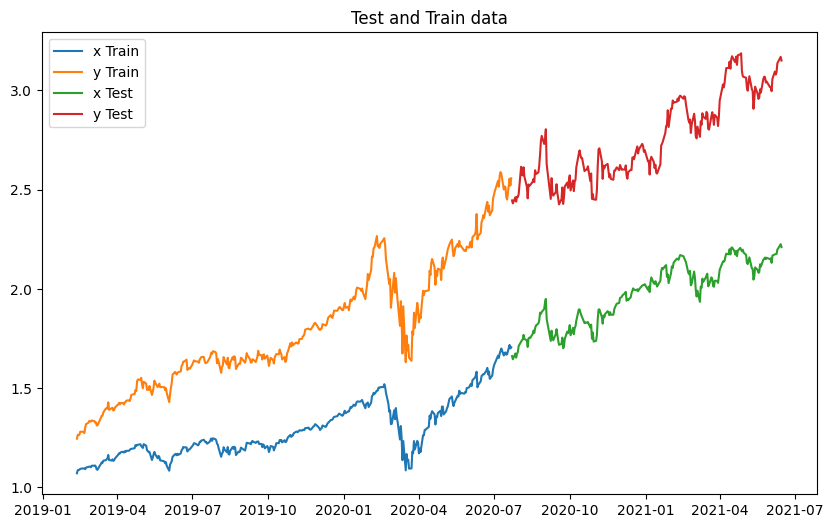

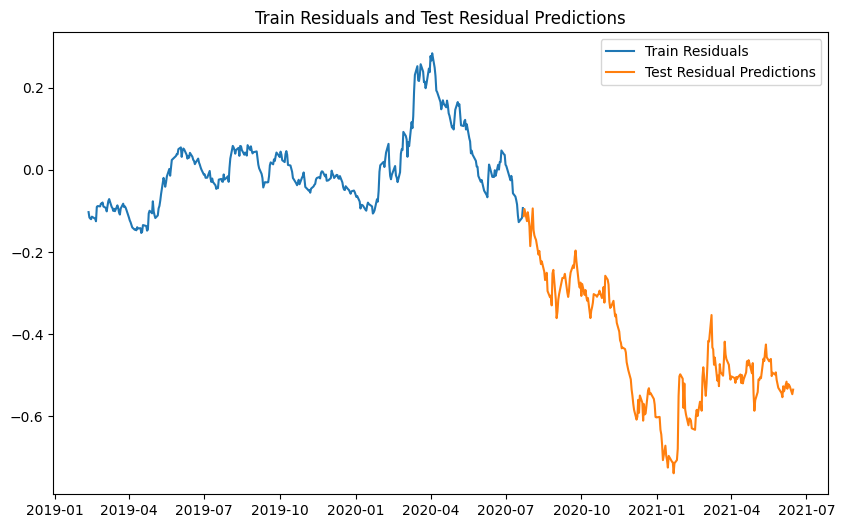


Linear Regresion TRAINING MSFT, QQQ
       Estimate  SD of Estimate  t-Statistic        p-value
const -0.849162        0.040782   -20.821803   6.396128e-64
QQQ    2.051034        0.031363    65.397464  6.197742e-203

Dicky Fuller TRAINING MSFT, QQQ
      1% DF     5% DF    10% DF  adf_statistic   p_value is_stationary
0 -3.448494 -2.869535 -2.571029      -1.999658  0.286723         False


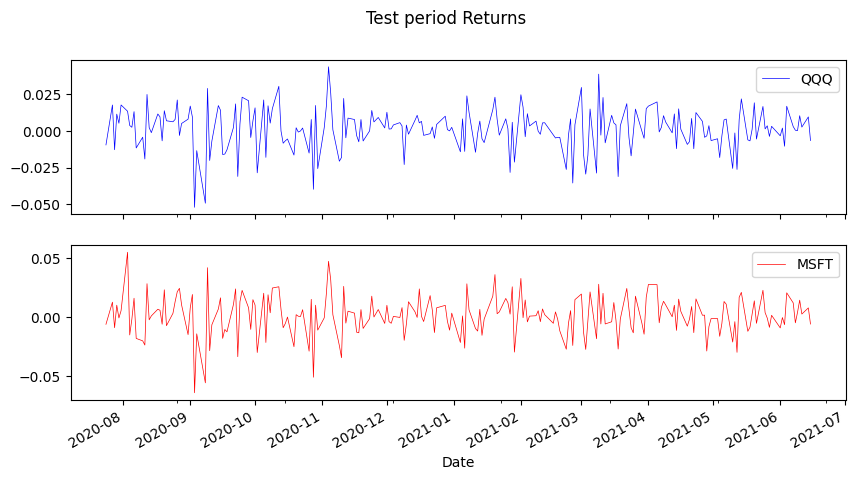

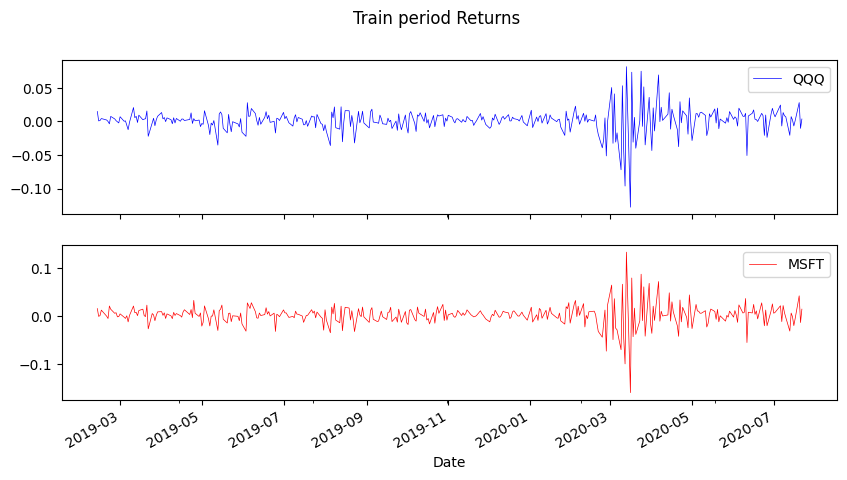

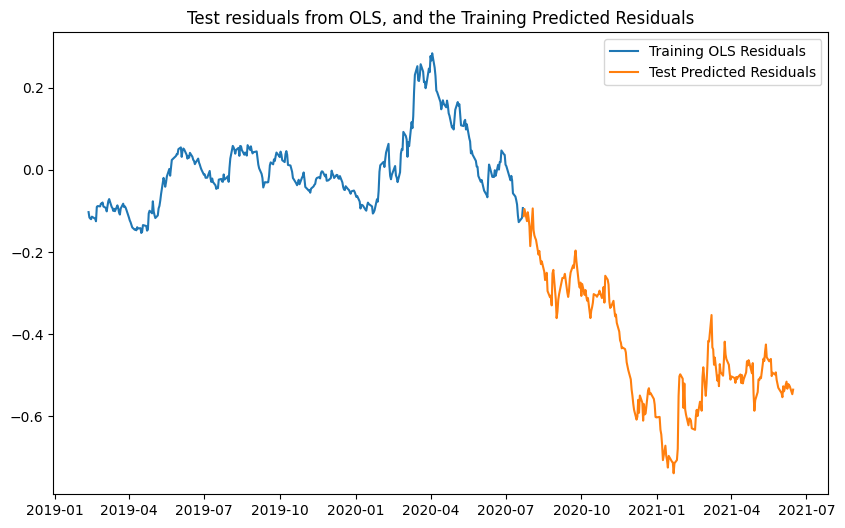

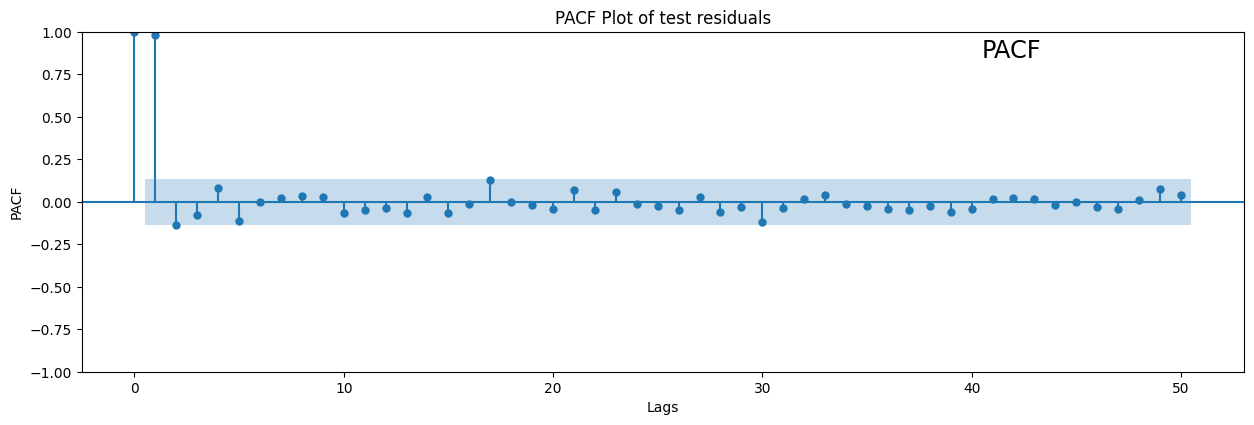

Overview ΔBTC on ΔETH  and lagged residuals


<Axes: title={'center': 'Range Bound Test OU Process'}, xlabel='Date'>

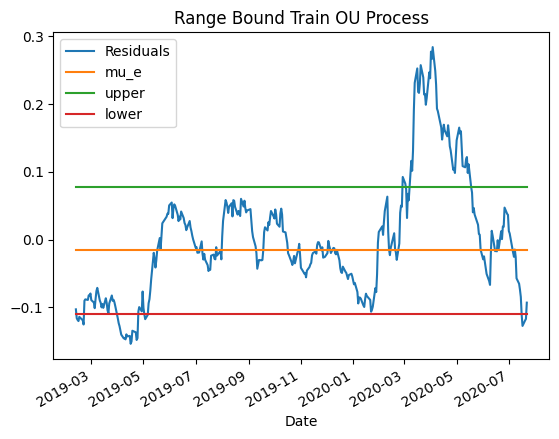

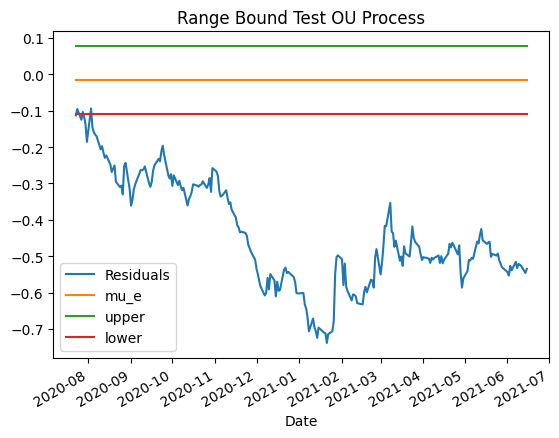

In [12]:
import matplotlib.pyplot as plt

y_norm = normalize_start_1(tickData['MSFT'])
x_norm = normalize_start_1(tickData['QQQ'])

# x_train, y_train, x_test, y_test = get_pivoted_test_train_data(y_norm, x_norm, end_look_back_date='2019-01-03', lookback_period=365)
x_train, y_train, x_test, y_test = get_pivoted_test_train_data(y_norm, x_norm, end_look_back_date='2020-01-03', lookback_period=365)

pair = TradingPair(x_train, y_train, x_test, y_test)

plt.figure(figsize=(10, 6))  # You can adjust the size as needed
plt.plot(pair.x_train, label='x Train')
plt.plot(pair.y_train, label='y Train')
plt.plot(pair.x_test, label='x Test')
plt.plot(pair.y_test, label='y Test')
plt.title('Test and Train data')  # You can customize the title
plt.legend()  # This adds the legend to the plot


plt.figure(figsize=(10, 6))  # You can adjust the size as needed
plt.plot(pair.train_residuals, label='Train Residuals')
plt.plot(pair.test_residual_predict, label='Test Residual Predictions')
plt.title('Train Residuals and Test Residual Predictions')  # You can customize the title
plt.legend()  # This adds the legend to the plot

plt.show() 
merged_returns_test = pd.merge(pair.returns_test_x,pair.returns_test_y, on='Date', how='inner')
merged_returns_test.plot(figsize=(10,5), color=('b', 'r', 'g'), subplots=True, linewidth=0.5, title="Test period Returns")
merged_returns_train = pd.merge(pair.returns_train_x,pair.returns_train_y, on='Date', how='inner')
merged_returns_train.plot(figsize=(10,5), color=('b', 'r', 'g'), subplots=True, linewidth=0.5, title="Train period Returns")

print()
print('Linear Regresion TRAINING', pair.name)
print(pair.linear_regression_training_df)
print()
print('Dicky Fuller TRAINING', pair.name)
print(pair.adf_lookback_df)


plt.figure(figsize=(10, 6))  # You can adjust the size as needed
plt.plot(pair.train_residuals, label='Training OLS Residuals')
plt.plot(pair.test_residual_predict, label='Test Predicted Residuals')
plt.title('Test residuals from OLS, and the Training Predicted Residuals')  # You can customize the title
plt.legend()  # This adds the legend to the plot
plt.show() 


from matplotlib import gridspec

plt.figure(1, figsize=(15, 20))
# gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 0.5, 0.5])

from statsmodels.graphics.tsaplots import plot_pacf

ax = plt.subplot(gs[2])
plot_pacf(pair.train_residuals, lags=50, alpha=0.01, ax=ax)
plt.title('PACF Plot of test residuals')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.text(x=40.5, y=0.85, s='PACF', size='xx-large')
plt.show() 


#Correction Equations - ECM - one way - do other by a reverse
ΔperiodicCointX = pd.DataFrame(pair.x_train).diff().dropna().add_prefix('Δ')
ΔperiodicCointY = pd.DataFrame(pair.y_train).diff().dropna().add_prefix('Δ')

rhs = ΔperiodicCointY.join(pair.train_residuals.shift(1).dropna().add_prefix('(Lag 1, ').add_suffix(')'))
rhs_ow = ΔperiodicCointX.join(pair.train_residuals.shift(1).dropna().add_prefix('(Lag 1, ').add_suffix(')')) 

model, EG_2,res_2 = linear_regression(ΔperiodicCointX, rhs, False)
print("Overview ΔBTC on ΔETH  and lagged residuals")
EG_2


pair.ou_range_bound_train_df.plot(title="Range Bound Train OU Process")
pair.ou_range_bound_test_df.plot(title="Range Bound Test OU Process")



In [4]:
y_test

Date
2019-01-05    0.281551
2019-01-06    0.298497
2019-01-07    0.294735
2019-01-08    0.295145
2019-01-09    0.295470
                ...   
2019-12-29    0.543497
2019-12-30    0.534004
2019-12-31    0.526726
2020-01-01    0.527207
2020-01-02    0.511486
Name: BTC-USD, Length: 363, dtype: float64

In [5]:
x_train, y_train, x_test, y_test = get_pivoted_test_train_data(tickData['ETH-USD'],tickData['BTC-USD'], end_look_back_date='2019-01-01', lookback_period=365)

x_train

Date
2018-01-01    13657.200195
2018-01-02    14982.099609
2018-01-03    15201.000000
2018-01-04    15599.200195
2018-01-05    17429.500000
                  ...     
2018-12-27     3654.833496
2018-12-28     3923.918701
2018-12-29     3820.408691
2018-12-30     3865.952637
2018-12-31     3742.700439
Name: BTC-USD, Length: 365, dtype: float64

In [6]:
EG_2

,Estimate,SD of Estimate,t-Statistic,p-value
ΔBTC-USD,1.350075,0.057245,23.58404,3.667522e-75
"(Lag 1, Residuals)",0.136039,0.021057,6.46064,3.366042e-10


In [7]:
# Assuming df is your DataFrame and it has a DateTimeIndex


    # def __init__(self,
    #              x_train, y_train,
    #              x_test, y_test):
    #     self.x_train = x_train
    #     self.y_train = y_train
    #     self.x_test = x_test
    #     self.y_test = y_test
     
pair_ = None

for i, train_x, train_y, test_x, test_y in generate_train_test_sets(tickData['BTC-USD'],tickData['ETH-USD']):
    pair_ = TradingPair(train_x, train_y, test_x, test_y)



    print(pair_.__repr__)


    # pair.__repr__


# pair_ = None

# for i, train_x, train_y, test_x, test_y in generate_train_test_sets(tickData['BTC-USD'],tickData['ETH-USD']):
#     pair_ = TradingPair(train_x, train_y, test_x, test_y)
#     print(pair_.__repr__)


    # print('Period ', i, 'train x start date', train_x.index.min(), 'train x end date', train_x.index.max())
    # # print('Period ', i, 'train y start date', train_y.index.min(), 'train y end date', train_y.index.max())
    # print('Period ', i, 'test x start date', test_x.index.min(), 'tes x end date', test_x.index.max())


# # Iterate over each train-test period
# for period, (train_x, train_y, test_x, test_y) in enumerate(pair.X,pair.Y):
#     print()


# periods_data = generate_train_test_sets(pair.X,pair.Y)


# one = periods_data.get(1)

# # Iterate through each period
# for period, (train_x, train_y, test_x, test_y) in enumerate(periods_data, start=1):
#     # Extract the train and test sets for the current period
#     train_x, train_y = data['train_x'], data['train_y']
#     test_x, test_y = data['test_x'], data['test_y']
#     print(f"Processing period {period}")
    

NameError: name 'generate_train_test_sets' is not defined

In [ ]:
periods_data.__repr__

<method-wrapper '__repr__' of generator object at 0x17851bd60>

SyntaxError: invalid syntax (1209101337.py, line 1)

In [ ]:

for i, train_x, train_y, test_x, test_y in generate_train_test_sets(tickData['BTC-USD'],tickData['ETH-USD']):
    # pair = TradingPair(train_x, train_y, test_x, test_y)
    print(i)
    pair = TradingPair(train_x, train_y, test_x, test_y)

0


AttributeError: 'Series' object has no attribute 'range'